In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
train.shape

(31962, 3)

In [4]:
train['label'].value_counts() # 0 positive 1 negative

0    29720
1     2242
Name: label, dtype: int64

In [5]:
train_positive = train[train['label']==0]

In [6]:
train_positive = train_positive.iloc[:12000, :]

In [7]:
train_positive.shape

(12000, 3)

In [8]:
train_positive.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
train_positive['label'].replace({0:'Positive'}, inplace=True)

In [10]:
train_positive.head()

,id,label,tweet
0,1,Positive,@user when a father is dysfunctional and is s...
1,2,Positive,@user @user thanks for #lyft credit i can't us...
2,3,Positive,bihday your majesty
3,4,Positive,#model i love u take with u all the time in ...
4,5,Positive,factsguide: society now #motivation


In [11]:
train_negative = train[train['label']==1]

In [12]:
train_negative.shape

(2242, 3)

In [13]:
train_negative.head(3)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!


In [14]:
train_negative['label'].replace({1:'Negative'}, inplace=True)

C:\Users\bapan\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
train_negative.head(3)

,id,label,tweet
13,14,Negative,@user #cnn calls #michigan middle school 'buil...
14,15,Negative,no comment! in #australia #opkillingbay #se...
17,18,Negative,retweet if you agree!


In [16]:
df = pd.read_csv('Sentiment-1.csv')
df.head(1)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito


In [17]:
df = df[['text', 'sentiment']]

In [18]:
df.shape

(13871, 2)

In [19]:
df.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [20]:
df.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [21]:
df_negative = df[df['sentiment']=='Negative']

In [22]:
df_negative.shape

(8493, 2)

In [23]:
df_negative.head()

,text,sentiment
6,RT @warriorwoman91: I liked her and was happy ...,Negative
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative
10,@JGreenDC @realDonaldTrump In all fairness #Bi...,Negative
12,Me reading my family's comments about how grea...,Negative


In [24]:
df_negative = df_negative.rename(columns={'text':'tweet'})

In [26]:
#df_negative['sentiment'].replace({'Negative':1}, inplace=True)

In [25]:
df_negative.head(3)

,tweet,sentiment
6,RT @warriorwoman91: I liked her and was happy ...,Negative
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative


In [26]:
train_negative = train_negative[['tweet', 'label']]

In [27]:
train_negative = train_negative.rename(columns={'label':'sentiment'})

In [28]:
train_negative.head(3)

,tweet,sentiment
13,@user #cnn calls #michigan middle school 'buil...,Negative
14,no comment! in #australia #opkillingbay #se...,Negative
17,retweet if you agree!,Negative


In [29]:
negative_tweets = pd.concat([df_negative, train_negative], axis=0)

In [30]:
negative_tweets.shape

(10735, 2)

In [31]:
negative_tweets.head()

,tweet,sentiment
6,RT @warriorwoman91: I liked her and was happy ...,Negative
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative
10,@JGreenDC @realDonaldTrump In all fairness #Bi...,Negative
12,Me reading my family's comments about how grea...,Negative


In [32]:
negative_tweets.isnull().sum().sum()

0

In [33]:
train_positive = train_positive[['tweet', 'label']]

In [34]:
train_positive = train_positive.rename(columns={'label':'sentiment'})

In [35]:
positive_tweets = train_positive

In [36]:
positive_tweets.head(3)

,tweet,sentiment
0,@user when a father is dysfunctional and is s...,Positive
1,@user @user thanks for #lyft credit i can't us...,Positive
2,bihday your majesty,Positive


In [37]:
positive_tweets.shape

(12000, 2)

In [38]:
positive_tweets.isnull().sum().sum()

0

In [39]:
Tweets = pd.concat([positive_tweets, negative_tweets], axis=0)

In [40]:
Tweets = Tweets.sample(frac=1, random_state=1).reset_index(drop=True)

In [41]:
Tweets.head()

,tweet,sentiment
0,this is disgusting #grandmother #grandsons #...,Negative
1,my all time favorite princess outfit ððð...,Positive
2,#fridayfeeling in the winery today with a fu...,Positive
3,"Christie: ""9/11 happened in my state."" When we...",Negative
4,wedding moments #bride #groom #bridesmaids ...,Positive


C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


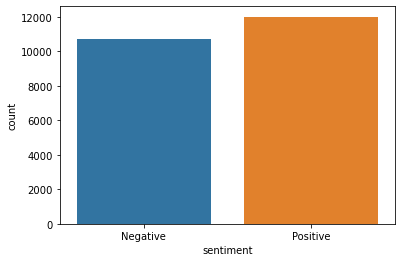

In [42]:
sns.countplot(Tweets['sentiment'])
plt.show()

In [43]:
Tweets.to_csv('Tweet_data.csv')

In [43]:
tweets = Tweets.tweet
tweets[3]

'Christie: "9/11 happened in my state." When we were running from the collapsing South Tower that day I had no idea we were in NJ. #GOPDebate'

In [44]:
from nltk.tokenize import RegexpTokenizer

In [45]:
data_list = list()
for comp in tweets:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

In [46]:
len(data_list)

22735

In [47]:
data_list[2]

['fridayfeeling',
 'in',
 'the',
 'winery',
 'today',
 'with',
 'a',
 'full',
 'bmw',
 'conveible',
 'amp',
 'valdobbiadene',
 'prosecco']

In [48]:
low = []
for line in data_list:
    lines = list(map(lambda x: x.lower(), line))
    low.append(lines)

In [49]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

In [50]:
stop_words =  list(punctuation) + stopwords.words('english')  
stop_words.remove('no')
stop_words.remove('not')

def tokenize(words):
    #words = word_tokenize(text)
    #words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words]

In [52]:
stop_words[0:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [53]:
filtered_sentiment = []
for file_id in low:
    words = tokenize(file_id)
    filtered_sentiment.append(words)

In [54]:
filtered_sentiment[2]

['fridayfeeling',
 'winery',
 'today',
 'full',
 'bmw',
 'conveible',
 'amp',
 'valdobbiadene',
 'prosecco']

In [55]:
print(len(filtered_sentiment))
print(len(low))

22735
22735


In [56]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bapan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
lmtzr = WordNetLemmatizer()

In [58]:
lemmatized = []
for line in filtered_sentiment:
    lines = list(map(lambda x: lmtzr.lemmatize(x), line))
    lemmatized.append(lines)

In [59]:
lemmatized[2]

['fridayfeeling',
 'winery',
 'today',
 'full',
 'bmw',
 'conveible',
 'amp',
 'valdobbiadene',
 'prosecco']

In [60]:
len(lemmatized)

22735

In [61]:
final_X = lemmatized

In [64]:
final_X[0:2]

[['disgusting', 'grandmother', 'grandson', 'exist', 'already'],
 ['time',
  'favorite',
  'princess',
  'outfit',
  'ð',
  'ð',
  'ð',
  'user',
  'user',
  'user',
  'camgirl']]

In [65]:
sent = []
for row in final_X:
    seq = ''
    for word in row:
        seq = seq + ' ' + word
    sent.append(seq)

In [66]:
sent[2]

' fridayfeeling winery today full bmw conveible amp valdobbiadene prosecco'

In [67]:
final_X = pd.Series(sent)

In [68]:
print(final_X[2])

 fridayfeeling winery today full bmw conveible amp valdobbiadene prosecco


In [69]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Masking, Bidirectional

In [70]:
vocabsize = 10000
tokenizer = Tokenizer(num_words = vocabsize, split=' ')
tokenizer.fit_on_texts(final_X.values)
X = tokenizer.texts_to_sequences(final_X.values)
X = pad_sequences(X)

In [71]:
X.shape

(22735, 52)

In [72]:
y = pd.get_dummies(Tweets['sentiment']).values

In [73]:
y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [74]:
Tweets['sentiment']

0        Negative
1        Positive
2        Positive
3        Negative
4        Positive
           ...   
22730    Positive
22731    Negative
22732    Positive
22733    Negative
22734    Positive
Name: sentiment, Length: 22735, dtype: object

In [75]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
                                       X, y, test_size=0.12, random_state=2)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20006, 52), (2729, 52), (20006, 2), (2729, 2))

In [78]:
X_train

array([[   0,    0,    0, ..., 1062,  183, 3220],
       [   0,    0,    0, ...,  114, 3691, 7091],
       [   0,    0,    0, ...,    1,  415, 9084],
       ...,
       [   0,    0,    0, ...,   25,    3,    5],
       [   0,    0,    0, ...,  824,  242,  160],
       [   0,    0,    0, ...,  297,   97,   45]])

In [76]:
embed_dim = 100
lstm_out = 196
model = Sequential()
model.add(Embedding(vocabsize, embed_dim, input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout = 0.2))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout = 0.2))
model.add(Dense(2, activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 52, 100)           1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 196)               232848    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 1,233,242
Trainable params: 1,233,242
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=5)

Epoch 1/5
563/563 [==============================] - 56s 95ms/step - loss: 0.1805 - accuracy: 0.9266 - val_loss: 0.1152 - val_accuracy: 0.9540
Epoch 2/5
563/563 [==============================] - 51s 91ms/step - loss: 0.0724 - accuracy: 0.9742 - val_loss: 0.1275 - val_accuracy: 0.9570
Epoch 3/5
563/563 [==============================] - 51s 90ms/step - loss: 0.0672 - accuracy: 0.9813 - val_loss: 0.1449 - val_accuracy: 0.9565
Epoch 4/5
563/563 [==============================] - 50s 89ms/step - loss: 0.0294 - accuracy: 0.9889 - val_loss: 0.1530 - val_accuracy: 0.9550
Epoch 5/5
563/563 [==============================] - 51s 90ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.1866 - val_accuracy: 0.9510


In [80]:
twts = ['Only fanatical crowd is easily controllable']
twts = tokenizer.texts_to_sequences(twts)
twts = pad_sequences(twts, maxlen=52, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1)[0]
#print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 1928 2030]]
positive


In [81]:
sentiment

array([0.00243606, 0.99756396], dtype=float32)

In [82]:
twts = ['''Modi talked about Swiss money but did nothing.
       Internally also he only harassed people with what chidambaram called demonization, 
       making the poor and middle class suffer for nothing.''']
       #['I use emotion for the many and reason for the few']]
#vectorizing the tweet by the pre-fitted tokenizer instance
twts = tokenizer.texts_to_sequences(twts)
#padding the tweet to have exactly the same shape as `embedding_2` input
twts = pad_sequences(twts, maxlen=52, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 4807 1424  112  171  349 9516
    18  472  355 8995  492 3825 1045  535 5196  171]]
positive


In [83]:
sentiment

array([9.127707e-04, 9.990872e-01], dtype=float32)

In [84]:
twts = ['''We are secular not because the word was added in our constitition.
           Secularism is in our blood.''']
       #['I use emotion for the many and reason for the few']]
#vectorizing the tweet by the pre-fitted tokenizer instance
twts = tokenizer.texts_to_sequences(twts)
#padding the tweet to have exactly the same shape as `embedding_2` input
twts = pad_sequences(twts, maxlen=52, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 4980   10 8995  127 2892 5939 5939 1492]]
positive


In [85]:
sentiment

array([0.00189535, 0.9981046 ], dtype=float32)

In [86]:
twts = ['''This is horrible...we need super gundai to kill gundai...she is like an unleashed monster,
           to tame her Modi Ji please show your Virat roop from early 2000s...''']
       #['I use emotion for the many and reason for the few']]
#vectorizing the tweet by the pre-fitted tokenizer instance
twts = tokenizer.texts_to_sequences(twts)
#padding the tweet to have exactly the same shape as `embedding_2` input
twts = pad_sequences(twts, maxlen=52, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 1018   41
   711  211   16 3616 2324 4807 9717  216   85  785]]
positive


In [87]:
sentiment

array([0.22717115, 0.7728288 ], dtype=float32)

In [88]:
pred_senti = []

for i in X_test:
    #print(i)
    Senti = model.predict(i.reshape(1,-1), batch_size = 1)[0]
    if np.argmax(Senti) == 0:
        pred_senti.append('negative')
    else:
        pred_senti.append('positive')

In [89]:
pred_senti[10:20]

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative']

In [90]:
y_test[10:20]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [92]:
final_X

0            disgusting grandmother grandson exist already
1         time favorite princess outfit ð ð ð user user...
2         fridayfeeling winery today full bmw conveible...
3         christie 9 11 happened state running collapsi...
4         wedding moment bride groom bridesmaid happine...
                               ...                        
22730                   wish picture taken father child ha
22731     rt rwsurfergirl american people pick next pre...
22732           u find watching food video ð ð made hungry
22733        rt auntcol54 keep religion politics gopdebate
22734     watch fancy tail vine mad mad teeth bite piss...
Length: 22735, dtype: object

In [93]:
from afinn import Afinn

In [94]:
af = Afinn()

In [95]:
X_train_af, X_test_af = train_test_split(
                                   final_X, test_size=0.12, random_state=111)

In [97]:
X_train_af.shape, X_test_af.shape, X_test.shape

((20006,), (2729,), (2729, 52))

In [98]:
X_train_af[10]

' mizmanning1 http co m2zi6acgno rt newyorkphotogal gopdebate obama right said gop ignorant iranian cul'

In [100]:
sentiment_scores = [af.score(tweet) for tweet in X_test_af]

In [101]:
an = ['positive' if score > 0 else 'negative' for score in sentiment_scores]

In [103]:
# an

In [104]:
actual = []
for i in range(len(y_test)):
    if y_test[i][1] == 1:
        actual.append('positive')
    else:
        actual.append('negative')

In [108]:
y_val

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [109]:
test_df = pd.DataFrame()
test_df['Actual Sentiment'] = actual
test_df['LSTM_Sentiment'] = pred_senti
test_df['Auto_Sentiment'] = an

In [110]:
test_df.head(10)

,Actual Sentiment,LSTM_Sentiment,Auto_Sentiment
0,positive,positive,negative
1,positive,positive,positive
2,negative,negative,positive
3,positive,positive,negative
4,negative,negative,negative
5,positive,positive,negative
6,positive,positive,negative
7,negative,negative,negative
8,positive,positive,negative
9,negative,negative,negative


In [111]:
confusion_df1 = pd.crosstab(test_df['Actual Sentiment'], test_df['LSTM_Sentiment'], rownames=['Actual'], colnames=['predicted'], margins=True)

In [112]:
confusion_df1

predicted,negative,positive,All
Actual,,,
negative,1180,75,1255
positive,46,1428,1474
All,1226,1503,2729


In [113]:
confusion_df2 = pd.crosstab(test_df['Actual Sentiment'], test_df['Auto_Sentiment'], rownames=['Actual'], colnames=['predicted'], margins=True)

In [114]:
confusion_df2

predicted,negative,positive,All
Actual,,,
negative,723,532,1255
positive,885,589,1474
All,1608,1121,2729


In [50]:
Tweets.head()

,tweet,sentiment
0,this is disgusting #grandmother #grandsons #...,Negative
1,my all time favorite princess outfit ððð...,Positive
2,#fridayfeeling in the winery today with a fu...,Positive
3,"Christie: ""9/11 happened in my state."" When we...",Negative
4,wedding moments #bride #groom #bridesmaids ...,Positive


In [47]:
t = ['Only fanatical crowd is easily controllable',
     
     '''Modi talked about Swiss money but did nothing.
       Internally also he only harassed people with what chidambaram called demonization, 
       making the poor and middle class suffer for nothing''',
     
    '''We are secular not because the word was added in our constitition.
           Secularism is in our blood''',
     
    '''This is horrible...we need super gundai to kill gundai...she is like an unleashed monster,
           to tame her Modi Ji please show your Virat roop from early 2000s..''']
t

['Only fanatical crowd is easily controllable',
 'Modi talked about Swiss money but did nothing.\n       Internally also he only harassed people with what chidambaram called demonization, \n       making the poor and middle class suffer for nothing',
 'We are secular not because the word was added in our constitition.\n           Secularism is in our blood',
 'This is horrible...we need super gundai to kill gundai...she is like an unleashed monster,\n           to tame her Modi Ji please show your Virat roop from early 2000s..']

In [48]:
Test = pd.DataFrame({'tweet': t})

In [51]:
Test

,tweet
0,Only fanatical crowd is easily controllable
1,Modi talked about Swiss money but did nothing....
2,We are secular not because the word was added ...
3,This is horrible...we need super gundai to kil...


In [52]:
Tweets_sm = Tweets[0:5000]

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [54]:
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf_matrix = tfidf.fit_transform(Tweets_sm['tweet'])

In [55]:
tfidf_matrix.shape

(5000, 12219)

In [56]:
X = tfidf_matrix.toarray()

In [57]:
y = Tweets_sm['sentiment']

In [58]:
y.replace({'Negative':0, 'Positive':1}, inplace=True)

C:\Users\bapan\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [68]:
X_train, X_val, y_train, y_val = train_test_split(
                                   X, y, test_size=0.2, random_state=1)

In [69]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4000, 12219), (1000, 12219), (4000,), (1000,))

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
lr = LogisticRegression(solver='liblinear', max_iter=3000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000, solver='liblinear')

In [74]:
print("Classification Report For Train Set:\n", classification_report(y_train, lr.predict(X_train)))

Classification Report For Train Set:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      1868
           1       0.91      1.00      0.95      2132

    accuracy                           0.95      4000
   macro avg       0.96      0.94      0.95      4000
weighted avg       0.95      0.95      0.95      4000



In [75]:
print("Classification Report For Test Set:\n", classification_report(y_val, lr.predict(X_val)))

Classification Report For Test Set:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       460
           1       0.88      1.00      0.93       540

    accuracy                           0.92      1000
   macro avg       0.94      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000



In [76]:
confusion_matrix(y_val, lr.predict(X_val))

array([[385,  75],
       [  1, 539]], dtype=int64)

In [77]:
Test

,tweet
0,Only fanatical crowd is easily controllable
1,Modi talked about Swiss money but did nothing....
2,We are secular not because the word was added ...
3,This is horrible...we need super gundai to kil...


In [78]:
tfidf_test = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf_matrix = tfidf_test.fit_transform(Test['tweet'])

In [79]:
tfidf_matrix.shape

(4, 40)

In [83]:
z = np.zeros((4,12179))

In [89]:
X_test = np.concatenate([tfidf_matrix.toarray(), z], axis=1)

In [90]:
X_test.shape

(4, 12219)

In [93]:
ypred_proba = lr.predict_proba(X_test)

In [94]:
ypred_proba

array([[0.27960542, 0.72039458],
       [0.24767655, 0.75232345],
       [0.2495218 , 0.7504782 ],
       [0.2700639 , 0.7299361 ]])